# Espacios de Color y métricas en imágenes

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ruta_imagen = "img/lena.jpeg"

# Se lee la imagen como BGR por default
imagen = cv2.imread(ruta_imagen)
# Se lee la imagen en RGB
imagen_RGB = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR_RGB)
# Se lee la imagen en BGR
imagen_BGR = cv2.imread(ruta_imagen, cv2.IMREAD_COLOR_BGR)
# Se lee la imagen en escala de grises
imagen_GRAYSCALE = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
# Se convierte a HSV desde RGB
imagen_HSV = cv2.cvtColor(imagen_RGB, cv2.COLOR_RGB2HSV)


In [ ]:
# El formato en el que debe estar la imagen debe ser en BGR
# De otra forma se mostrará mal
cv2.imshow("Imagen a color en BGR", imagen_BGR)
cv2.waitKey(0)

In [ ]:
print(f'Estructura de la imagen RGB {imagen_RGB.shape}')
print(f'Estructura de la imagen HSV {imagen_HSV.shape}')
print(f'Estructura de la imagen escala de grises {imagen_GRAYSCALE.shape}')

# Análisis de una imagen en escala de grises

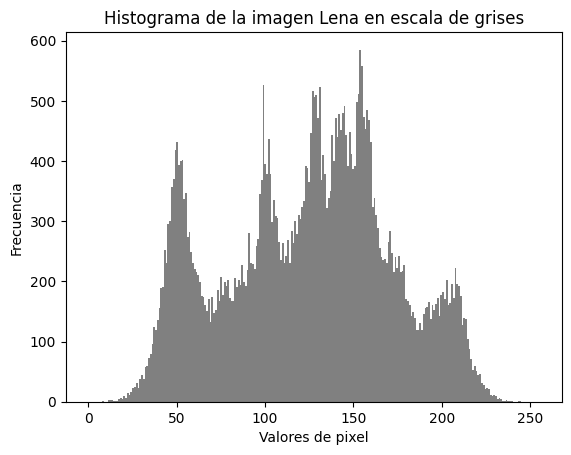

In [3]:
"""
cv2.calcHist Cálculo del histograma de una imagen con OpenCV

Args:
    imagen: Imagen a calcularle el histograma.
    canales: lista desde cero hasta numero de canales.
    mask: Si aplica.
    bins: En lista por canal rango de valores por pixel.
Returns:
    Cálculo del histograma.
"""
histograma = cv2.calcHist(imagen_GRAYSCALE, [0], None, [256], [0,255])

# También se puede obtener y mostrar el histograma directamente con Matplotlib
# Sólo la imagen se debe desdoblar (2D -> 1D) en el cálculo del histograma.
plt.figure()
#plt.plot(histograma) # Tambíen se puede graficar el histograma calculado con cv2.
plt.hist(imagen_GRAYSCALE.flatten(), bins=256, range=(0,255), color="gray")
plt.xlabel("Valores de pixel")
plt.ylabel("Frecuencia")
plt.title("Histograma de la imagen Lena en escala de grises")
plt.show()

In [ ]:
def calcular_entropia(imagen):
    """Calcula la entropía de una imagen en escala de grises
    
    La entropía en imágenes es una medida de la complejidad, información o incertidumbre
    en la distribución de intensidades de los píxeles. Su interpretación varía según
    la forma del histograma:
    
    INTERPRETACIÓN POR VALORES DE ENTROPÍA (para imágenes 8-bit):
    
    BAJA ENTROPÍA (0-2 bits):
        - Imagen con poca información/complejidad visual
        - Histograma muy concentrado en pocos valores
        - Típico en: fondos uniformes, imágenes muy oscuras/claras, 
          objetos simples sobre fondo contrastante
        - Ejemplos: cielo despejado, hoja blanca con texto negro, 
          silueta sobre fondo plano
    
    ENTROPÍA MEDIA (3-5 bits):
        - Cantidad moderada de información visual
        - Histograma balanceado pero no uniforme
        - Imágenes naturales y fotografías típicas
        - Texturas visibles pero no excesivamente complejas
        - Ejemplos: retratos, paisajes, imágenes médicas estándar
    
    ALTA ENTROPÍA (6-8 bits):
        - Máxima información/complejidad visual
        - Histograma cercano a la distribución uniforme
        - Indica: mucho ruido, texturas muy detalladas, 
          patrones complejos o imágenes compuestas
        - Ejemplos: ruido sal y pimienta, texturas detalladas, 
          multitudes, imágenes esteganográficas
    
    RELACIÓN ENTRE HISTOGRAMA Y ENTROPÍA:
        1. Histograma unimodal muy estrecho → Entropía muy baja
        2. Histograma con varios picos → Entropía media
        3. Histograma plano/ruidoso → Entropía alta (cercana a log2(L))
        4. Histograma bimodal bien separado → Entropía media-baja
    
    APLICACIONES PRÁCTICAS:
        - Compresión: baja entropía = alta compresibilidad
        - Detección de ruido: alta entropía puede indicar ruido
        - Análisis de texturas: entropía como descriptor
        - Segmentación: áreas uniformes vs detalladas
        - Esteganografía: cambios en entropía pueden revelar datos ocultos
    
    """
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Calcular histograma normalizado
    hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
    hist_norm = hist / hist.sum()
    
    # Eliminar ceros para evitar problemas con log
    hist_norm = hist_norm[hist_norm > 0]
    
    # Calcular entropía
    entropia = -np.sum(hist_norm * np.log2(hist_norm))
    
    return entropia


In [8]:
imagen_GRAYSCALE_flat = imagen_GRAYSCALE.flatten()

media = np.mean(imagen_GRAYSCALE_flat)
mediana = np.median(imagen_GRAYSCALE_flat)
desviacion_std = np.std(imagen_GRAYSCALE_flat)
contraste = imagen_GRAYSCALE_flat.max() - imagen_GRAYSCALE_flat.min()
entropia = calcular_entropia(imagen_GRAYSCALE)

print(f"Media: {media}, Mediana: {mediana}, Desviación Estándar: {desviacion_std}, Contraste: {contraste}, Entropía: {entropia}")


Media: 124.06253827160494, Mediana: 129.0, Desviación Estándar: 47.72350323026929, Contraste: 237, Entropía: 7.46944522857666
